# Data Wrangling

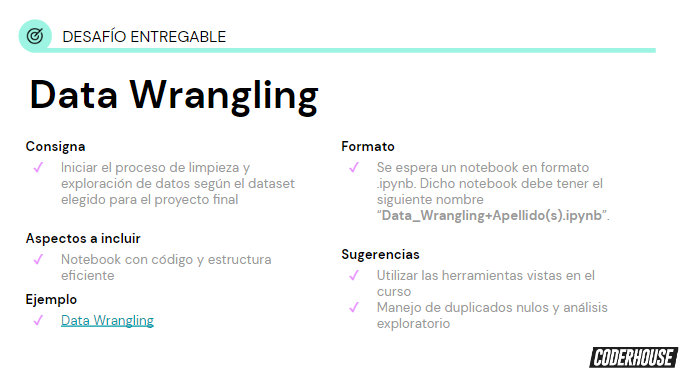

## Introduccion

Para esta nueva entrega se buscara realizar una preparacion de los datos, dejandolos listos para suu futuro analisis y modelado. Para este fin se seguiran los siguientes pasos.

1- Cargar los datos que debemos preparar

2- Breve analisis exploratorio que consistira de:

    a. Tamaño del Dataset
    
    b. ¿Existen datos faltantes?
    
    c.¿De que tipo son los datos?
    
    d. ¿Existen datos duplicados?
    
    e. ¿Existen valores atipicos?
    
3- Eliminar columnas que no aporten informacion relevante

4- Tratamiento de datos vacios

5- Tratamiento de valores atipicos

6- Transformacion de los datos

7- Presentacion final

# Desarrollo

Comenzamos importando las librerias necesarias para el desarrollo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_skillcraft = pd.read_csv(r'C:\Users\Gaspar\Desktop\DataScience\SkillCraft.csv', delimiter = ",")

Una vez que tenemos el dataset cargado comenzaremos un breve analisis de los datos.

### Analisis exploratorio

En este breve analisis veremos los puntos enumerados anteriormente.

In [3]:
data_skillcraft.shape

(3338, 20)

In [4]:
data_skillcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [5]:
data_skillcraft.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [6]:
data_skillcraft.drop_duplicates(inplace=True)

data_skillcraft.shape

(3338, 20)

Como se puede observar nuestro dataset tiene poco mas de 3300 registrosy contiene 20 columnas, no posee datos vacios y aproximadamente la mitad de los datos son numericos y la mitad de tipo texto, finalmente no teniamos datos repetidos.

# Tratamiento de Datos

Una vez finalizado este breve analisis de los datos comenzaremos a limpiarlos y prepararlos para su posterior uso.

Comenzaremos eliminando las columnas que no nos aportan informacion relevante.

La columna de GameID la informacion que nos aporta es un numero al azar asignado por el juego a cada jugador. Al ser al azar no se puede obtener ningun timpo de inforacion de este valor y no podremos utilizarlo para nuestro analisis, por lo tanto vamos a prescindir de esta variable.

In [7]:
data_skillcraft.drop("GameID", axis=1)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3334,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3335,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3336,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


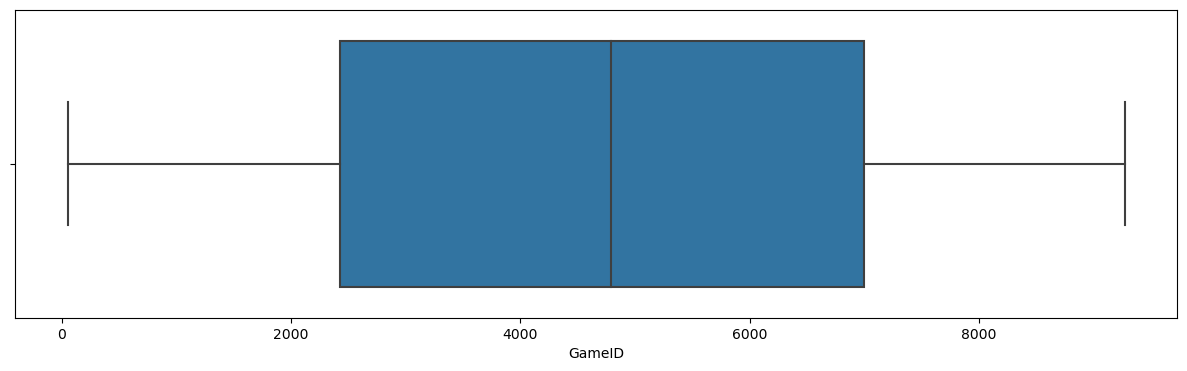

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


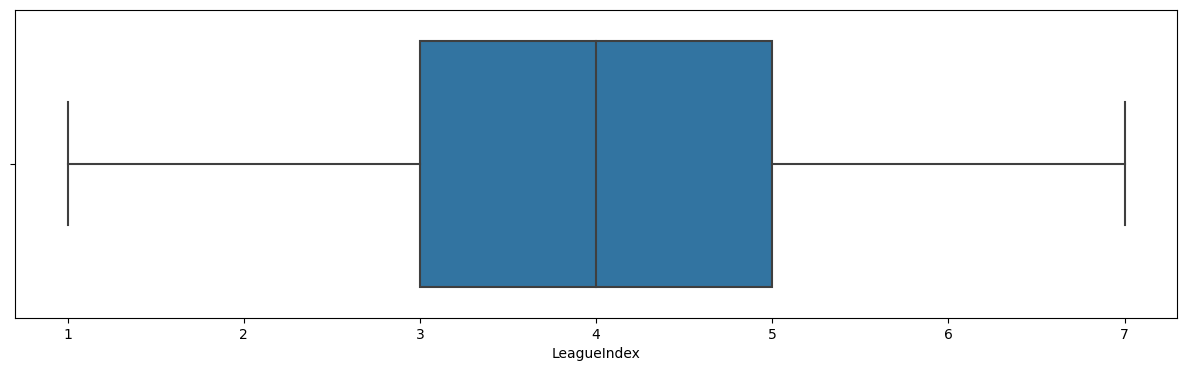

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


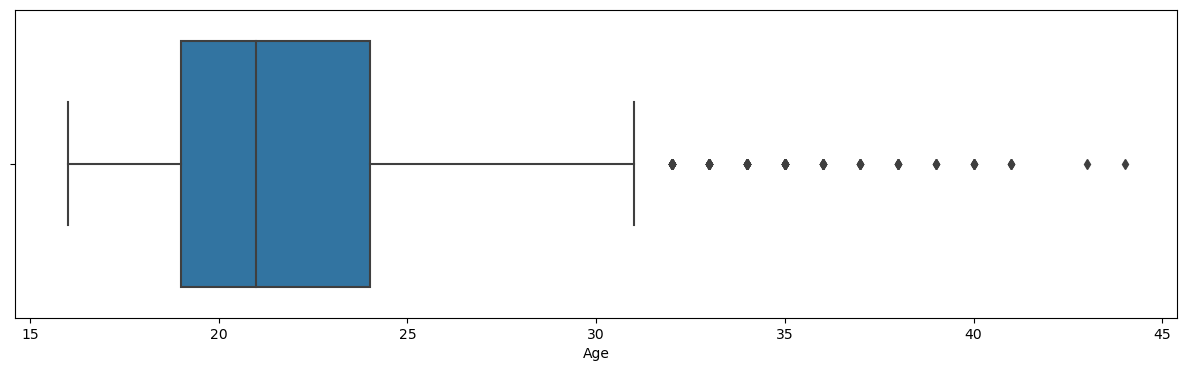

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


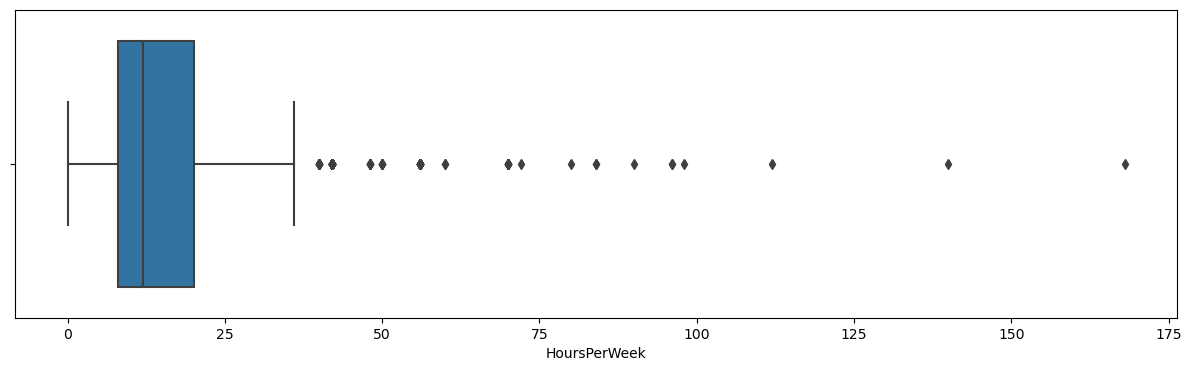

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


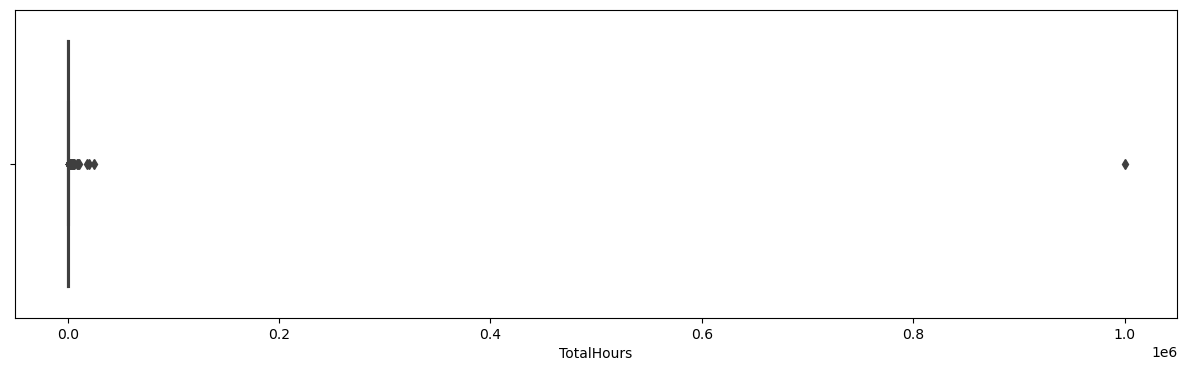

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


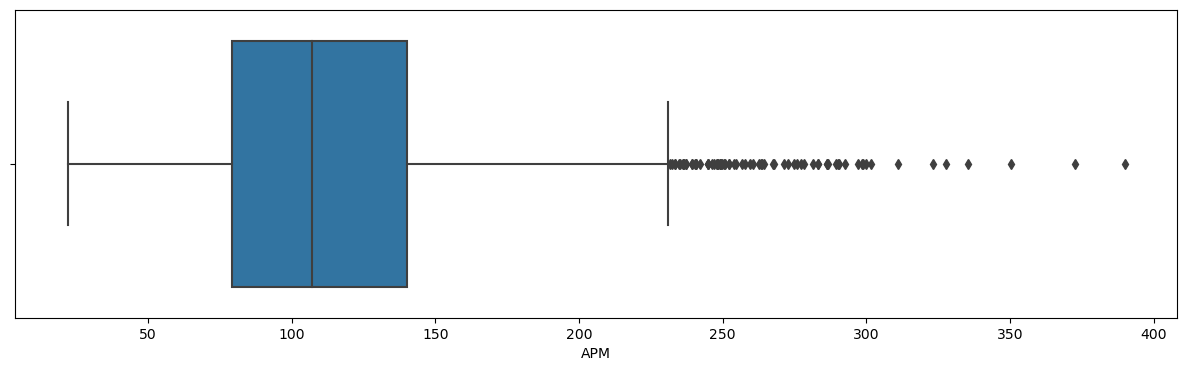

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


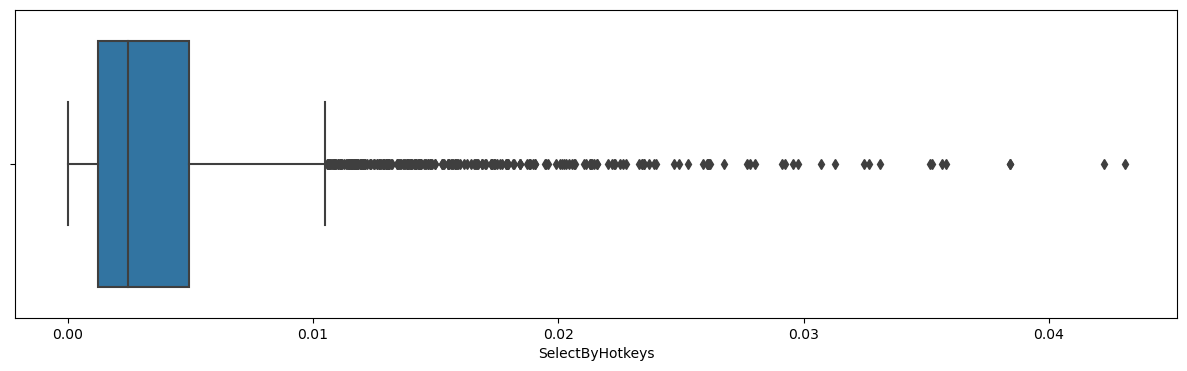

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


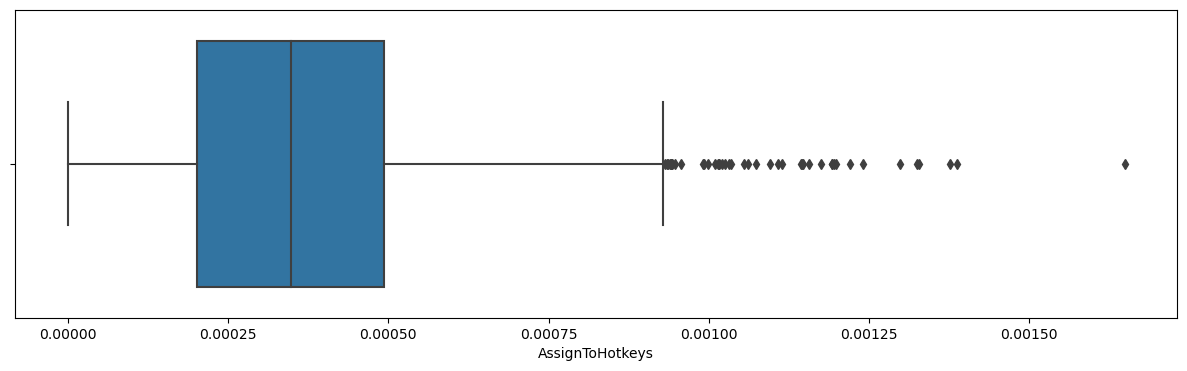

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


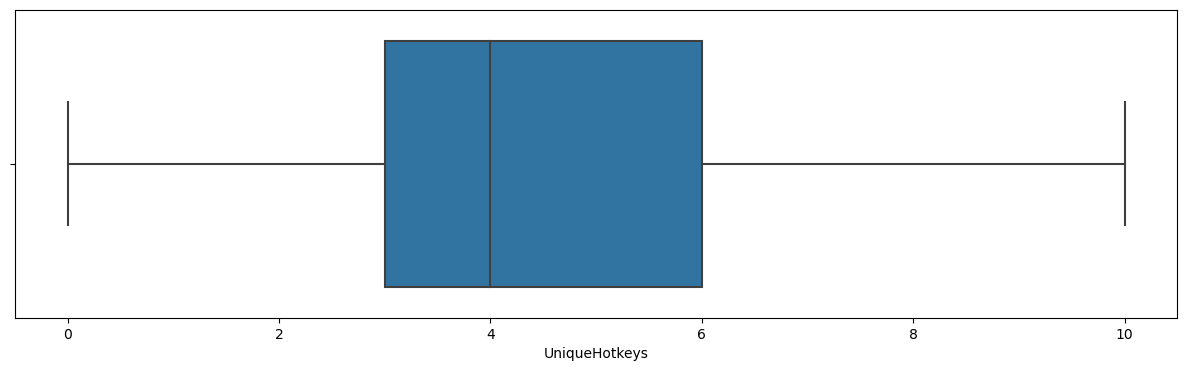

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


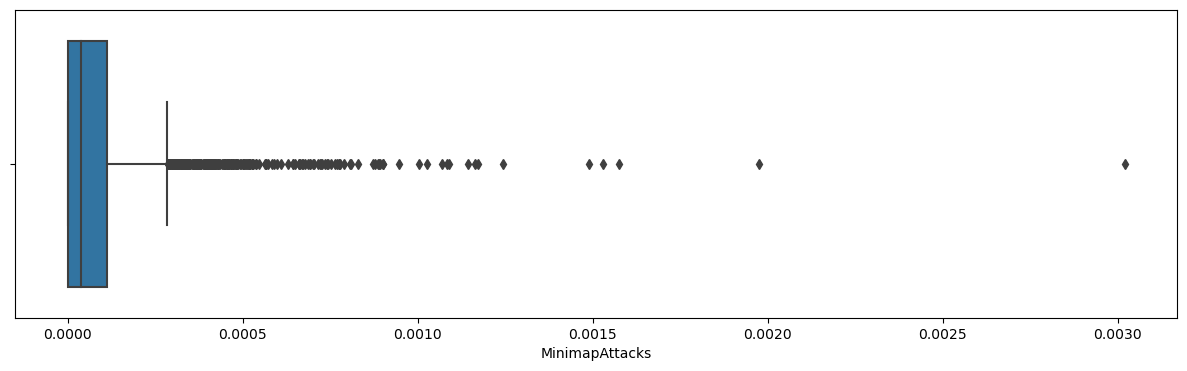

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


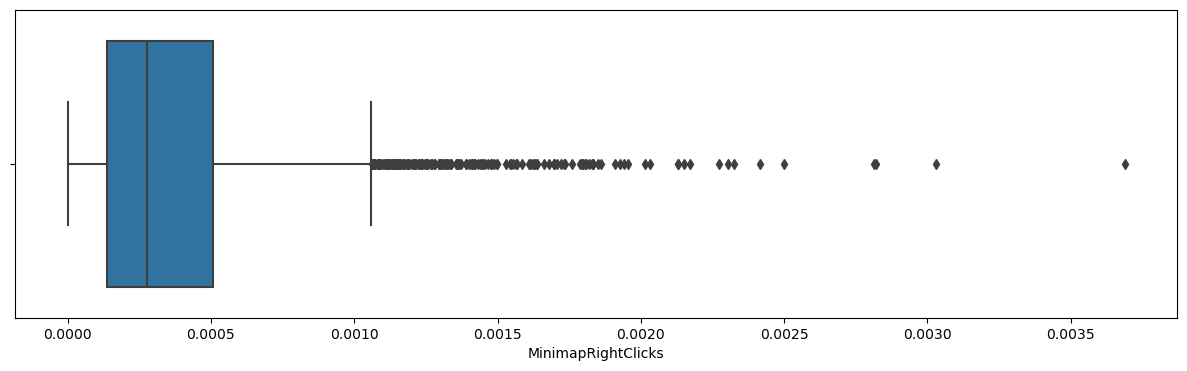

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


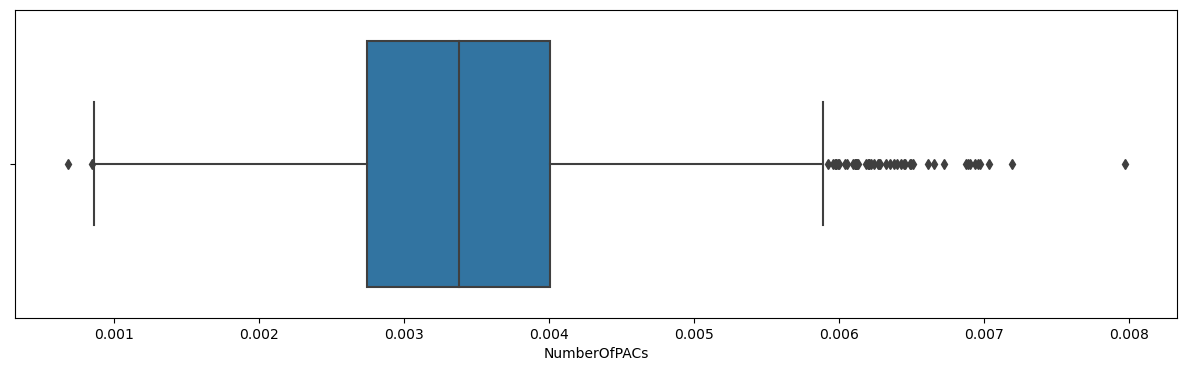

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


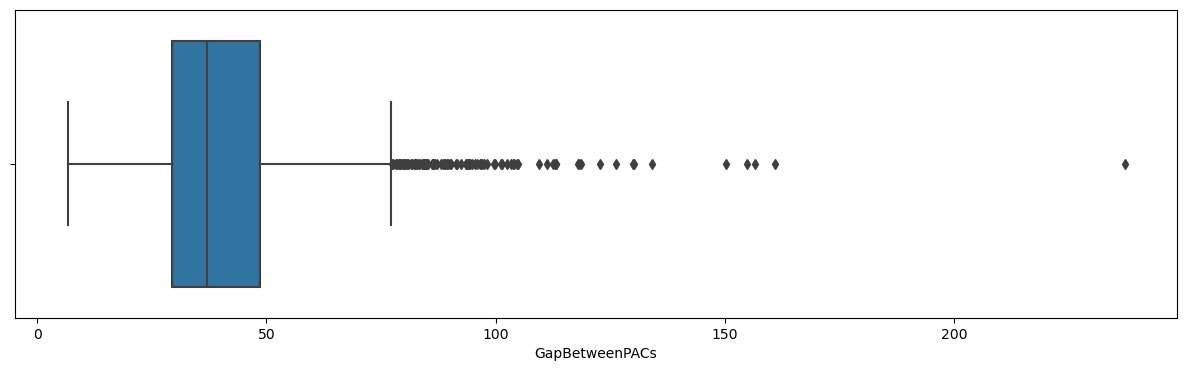

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


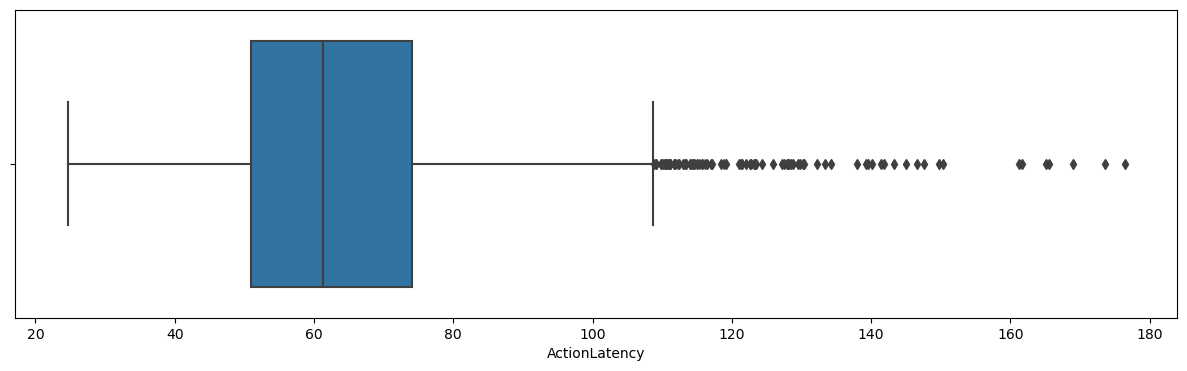

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


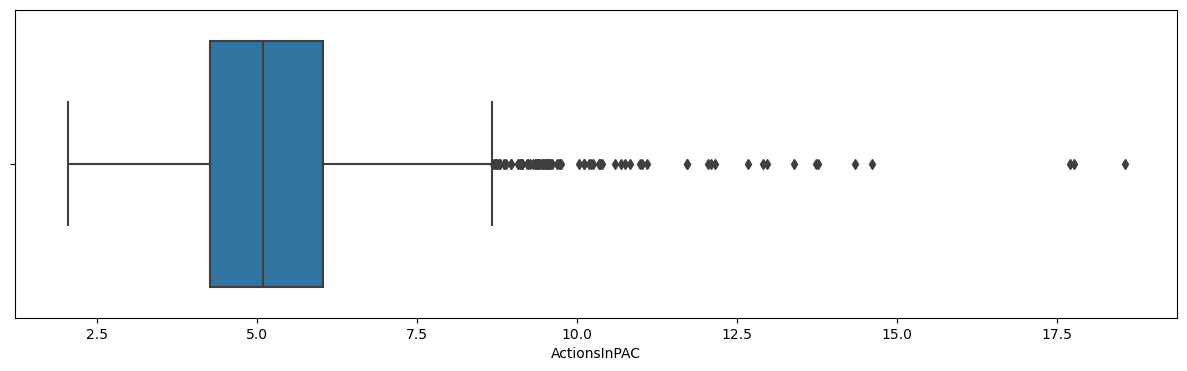

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


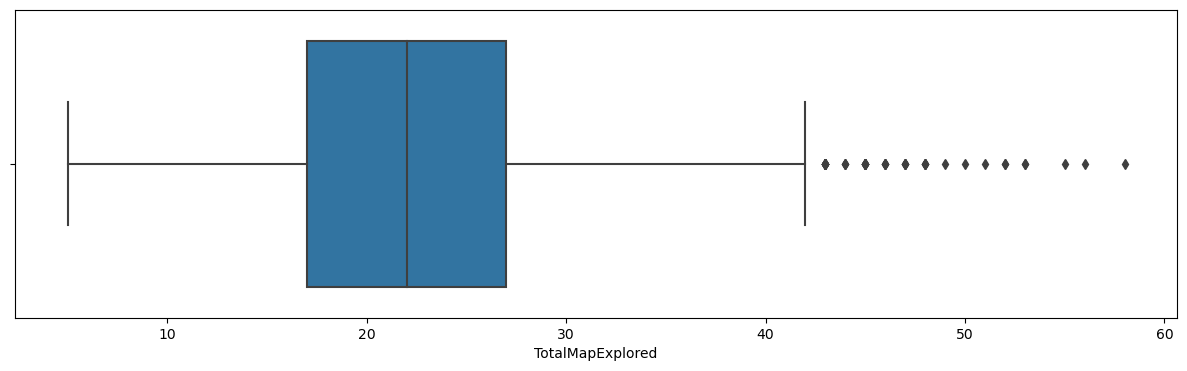

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


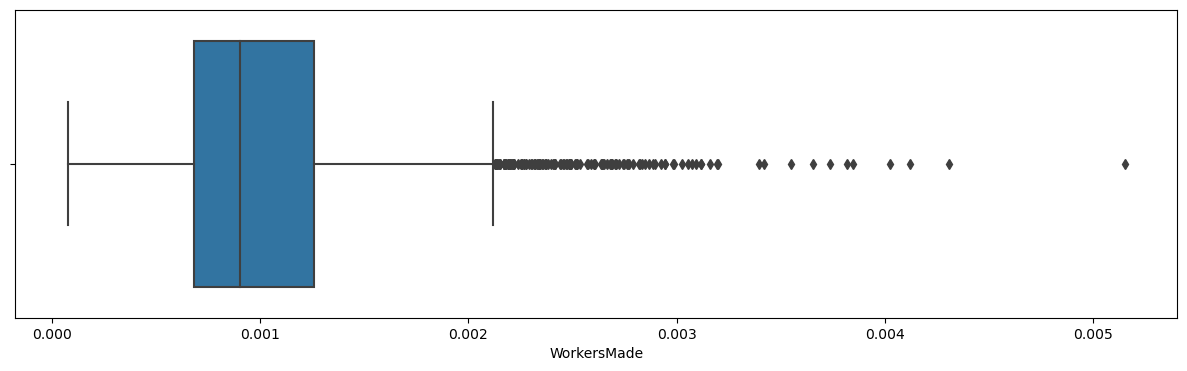

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


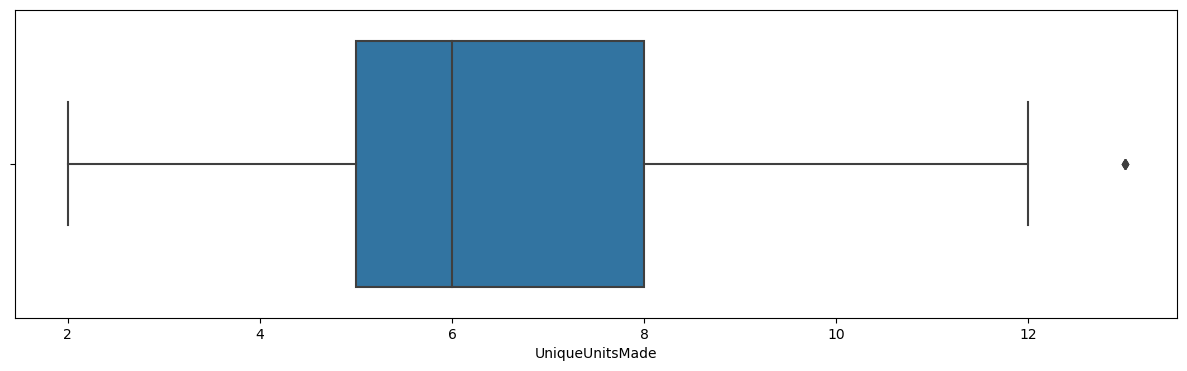

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


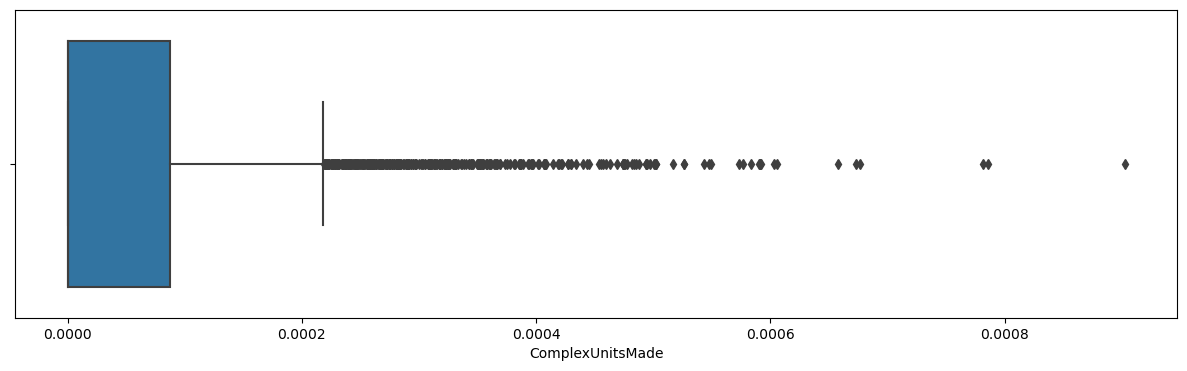

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


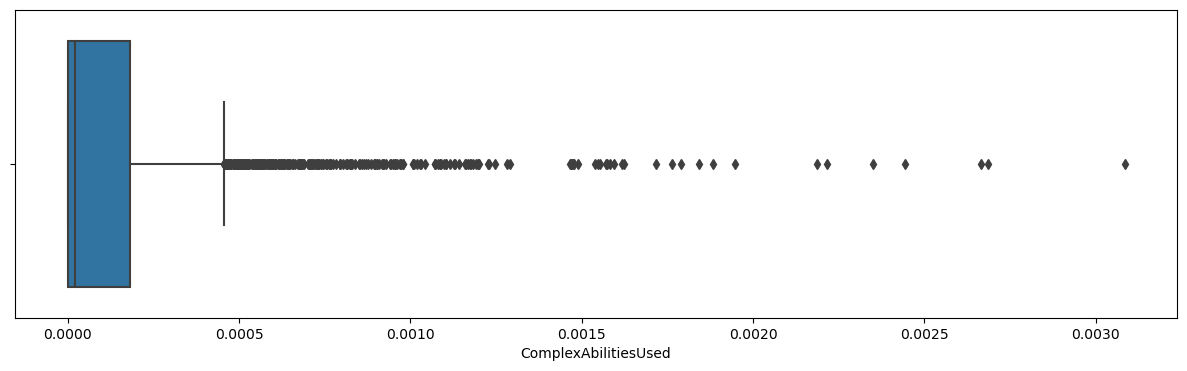

In [8]:
columns = list(data_skillcraft.columns)

for col in columns:
    fig, ax = plt.subplots(figsize=(15, 4))
    ax = sns.boxplot(data_skillcraft[col])
    plt.show()

Observando las graficas podemos ver un dato een particular en las horas totales que es estremadamente alto, debido a que no hay una explicacion para este valor lo mas probable es que sea un error a la hora de cargar los datos. Este registro en àrticular sera eliminado para que no afecte el analisis de los datos y su posterior modelado.

In [9]:
value = data_skillcraft["TotalHours"].max()
value

1000000

In [10]:
indice = data_skillcraft[data_skillcraft["TotalHours"]==value].index
indice

Int64Index([1792], dtype='int64')

In [11]:
data_skillcraft.drop(indice, inplace=True)

In [12]:
data_skillcraft["TotalHours"].max()

25000

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


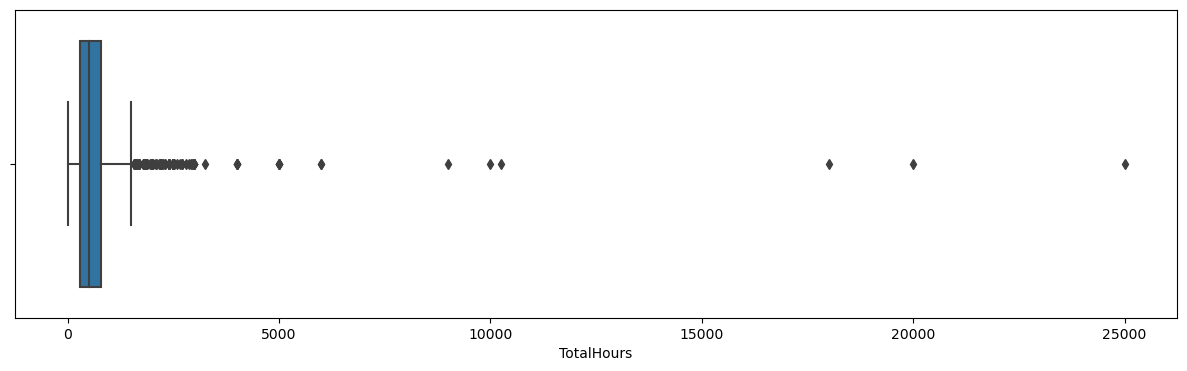

In [13]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = sns.boxplot(data_skillcraft["TotalHours"])
plt.show()

A pesar de continuar teniendo outliers visiblemente mayores a la media, estos se pueden expliocar como jugadores que han jugado desde los inicios del juego con una constancia y una cantidad de horas al dia aceptablemente elevados.

Solo a modo ilustrativo, al momento de crear este dataset el juego llevaba 10 años desde su lanzamiento, serian unos 3650 dias, a 8 horas por dias son 29200 horas. Por lo que nuestro jugador con mas horas jugadas tiene aproximadamente 7 horas por dia en promedio desde el lanzamiento del juego, muy alejado del millon de horas que tenia el registro eliminado.

Tambien sirve aclarar que, a pesar que la descripcion del dataset no lo dice, parece que la variable "TotalHours" cuenta las horas con el juego en ejecucion y no las horas en partida, por lo que las horas reales jugadas por cada jugador puede que sea considerablemente menor a las registradas

Para cerrar veremos como afecta el tiempo total de juego a algunas variables y sacaremos una conclucion sobre si es verdad que a mayor dedicacin uno se vuelve mejor.

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


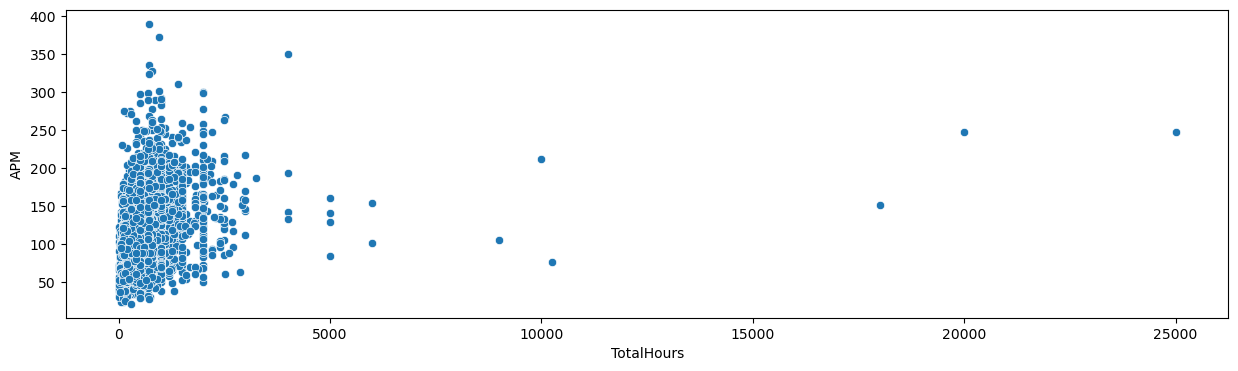

In [27]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = sns.scatterplot(data_skillcraft["TotalHours"], data_skillcraft["APM"])
plt.show()

A esta escala no se logra observar ningun patron o relacion entre las variables, en parte debido a la gran acumulacion de datos en la misma region. Veamos que ocurre donde esta la mayor concentracion

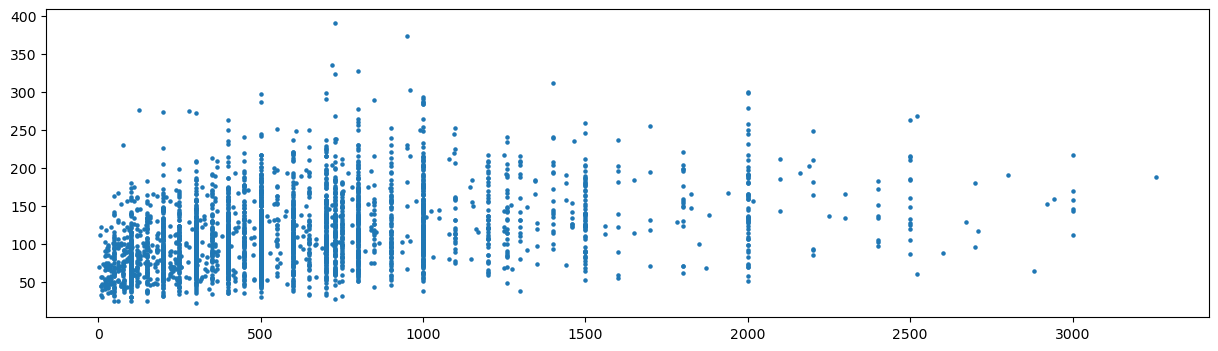

In [30]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.scatter(data_skillcraft.query("TotalHours < 3500")['TotalHours'],data_skillcraft.query("TotalHours < 3500")['APM'],s=5)
plt.show()

De esta forma se puede ver un aumento de las APM hasta aproximadamente las mil horas y luego una disminucion de las mismas, de todas fromas esta disminucion se puede deber a la escaces de los datos a partir de esa cantidad de timpo.

D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


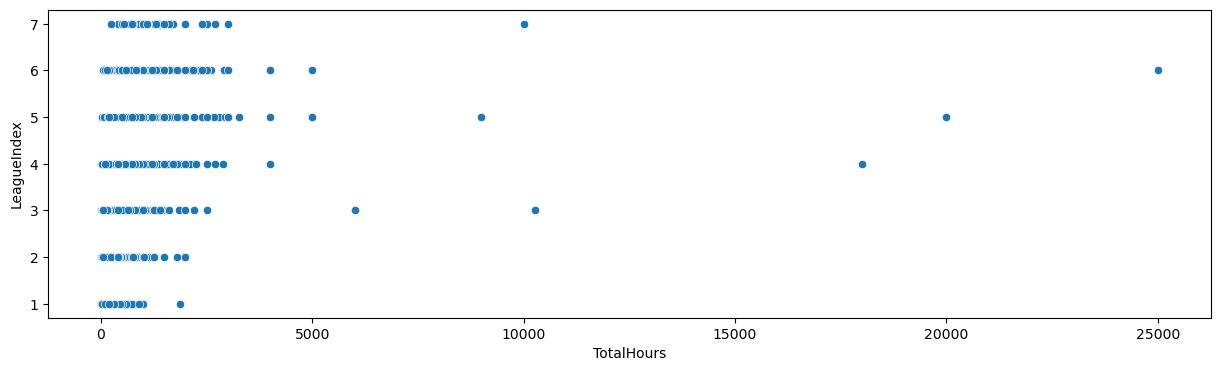

In [31]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = sns.scatterplot(data_skillcraft["TotalHours"], data_skillcraft["LeagueIndex"])
plt.show()

Logramos observar un aumento de las divisiones a medida que los jugadores tienen mas horas de juego, veamos con un poco mas de zoom

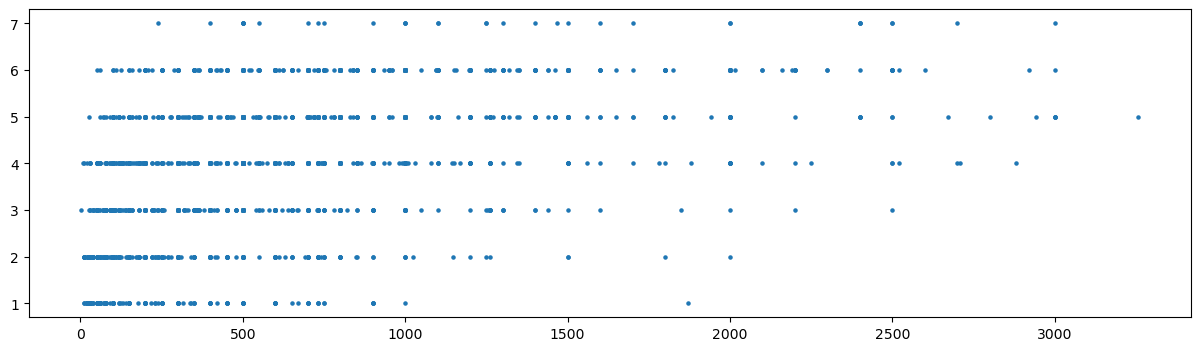

In [32]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.scatter(data_skillcraft.query("TotalHours < 3500")['TotalHours'],data_skillcraft.query("TotalHours < 3500")['LeagueIndex'],s=5)
plt.show()